In [6]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [7]:
version = 16
zarr_path = f"../data/memory/memory_v{version}.zarr"
data = zarr.open(zarr_path, mode='r')
if version == 6 or version == 7 or version == 8 or version == 9 or version == 13 or version == 16:
    env = 4
elif version == 5:
    env = 3
else:
    env = 2

In [8]:
zarr_path = f"../data/memory/test60gmts.zarr"
data = zarr.open(zarr_path, mode='r')

In [9]:
states = np.array(data['data']['state'])
print(states[:200])
filtered_states = states[(states[:, 2] == 0) & (states[:, 3] == 0)]
print(filtered_states[:200])


[[256.       450.       462.        50.         1.      ]
 [258.3654   454.4351   462.        50.         1.      ]
 [259.7446   454.8036   462.        50.         1.      ]
 [259.9973   452.8756   462.        50.         1.      ]
 [259.4342   449.42105  462.        50.         1.      ]
 [258.19495  442.28067  462.        50.         1.      ]
 [257.16284  433.70886  462.        50.         1.      ]
 [256.5757   426.9916   462.        50.         1.      ]
 [256.8682   418.56192  462.        50.         1.      ]
 [257.95453  408.1442   462.        50.         1.      ]
 [258.909    398.63892  462.        50.         1.      ]
 [259.45834  389.18903  462.        50.         1.      ]
 [259.7392   379.11017  462.        50.         1.      ]
 [260.17184  367.10812  462.        50.         1.      ]
 [261.14886  352.67065  462.        50.         1.      ]
 [262.30765  338.28653  462.        50.         1.      ]
 [262.23825  322.5193   462.        50.         1.      ]
 [261.42795  3

In [10]:
states = np.array(data['data']['state'])
filtered_states = states[(states[:, 2] == 0) & (states[:, 3] == 0)]

original_episode_ends = np.array(data['meta']['episode_ends'])
filtered_episode_ends = []

start_idx = 0
for end_idx in original_episode_ends:
    episode_mask = (states[start_idx:end_idx, 2] == 0) & (states[start_idx:end_idx, 3] == 0)
    num_filtered_rows = np.sum(episode_mask)
    filtered_episode_ends.append(num_filtered_rows + (filtered_episode_ends[-1] if filtered_episode_ends else 0))
    start_idx = end_idx

filtered_episode_ends = np.array(filtered_episode_ends)

start_idx = 0
episodes = []
for end_idx in filtered_episode_ends:
    episodes.append(filtered_states[start_idx:end_idx])
    start_idx = end_idx



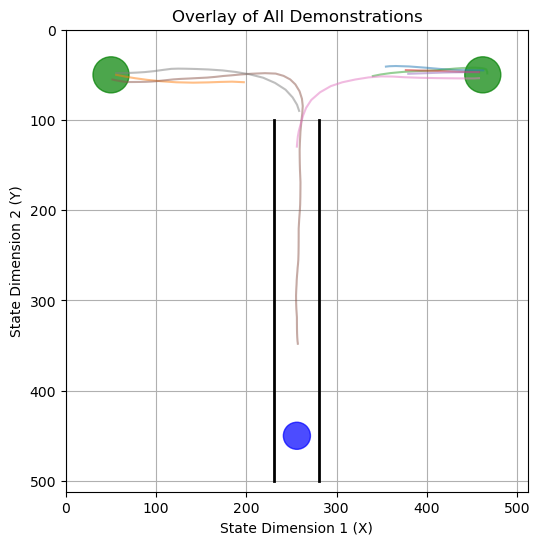

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
for episode in episodes:
    plt.plot(episode[:, 0], episode[:, 1], alpha=0.5)
    
if env == 2:
    plt.plot([206, 206], [450, 100], color='black', linewidth=2, label="Wall 1")
    plt.plot([306, 306], [450, 100], color='black', linewidth=2, label="Wall 2")

    ax = plt.gca()
    circle1 = patches.Circle((256, 400), 15, color='blue', alpha=0.7, label="Circle 1")
    ax.add_patch(circle1)
    circle2 = patches.Circle((400, 50), 20, color='green', alpha=0.7, label="Circle 2")
    ax.add_patch(circle2)
    circle3 = patches.Circle((112, 50), 20, color='green', alpha=0.7, label="Circle 3")
    ax.add_patch(circle3)
elif env==4:
    plt.plot([231, 231], [500, 100], color='black', linewidth=2, label="Wall 1")
    plt.plot([281, 281], [500, 100], color='black', linewidth=2, label="Wall 2")

    ax = plt.gca()
    circle1 = patches.Circle((256, 450), 15, color='blue', alpha=0.7, label="Circle 1")
    ax.add_patch(circle1)
    circle2 = patches.Circle((462, 50), 20, color='green', alpha=0.7, label="Circle 2")
    ax.add_patch(circle2)
    circle3 = patches.Circle((50, 50), 20, color='green', alpha=0.7, label="Circle 3")
    ax.add_patch(circle3)    
else:
    pass
plt.xlim(0, 512)
plt.ylim(0, 512)
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Overlay of All Demonstrations")
plt.xlabel("State Dimension 1 (X)")
plt.ylabel("State Dimension 2 (Y)")
plt.grid(True)
#plt.savefig(f"overlay_plot_{version}_without_goal_knowledge.png", dpi=300)
plt.show()